In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('train.csv')

In [6]:
pd.set_option('display.max_columns',None)

In [8]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >1]
for feature in features_with_na : 
    print(feature, np.round(dataset[feature].isnull().mean(),4), '% null values')

LotFrontage 0.1774 % null values
Alley 0.9377 % null values
MasVnrType 0.0055 % null values
MasVnrArea 0.0055 % null values
BsmtQual 0.0253 % null values
BsmtCond 0.0253 % null values
BsmtExposure 0.026 % null values
BsmtFinType1 0.0253 % null values
BsmtFinType2 0.026 % null values
FireplaceQu 0.4726 % null values
GarageType 0.0555 % null values
GarageYrBlt 0.0555 % null values
GarageFinish 0.0555 % null values
GarageQual 0.0555 % null values
GarageCond 0.0555 % null values
PoolQC 0.9952 % null values
Fence 0.8075 % null values
MiscFeature 0.963 % null values


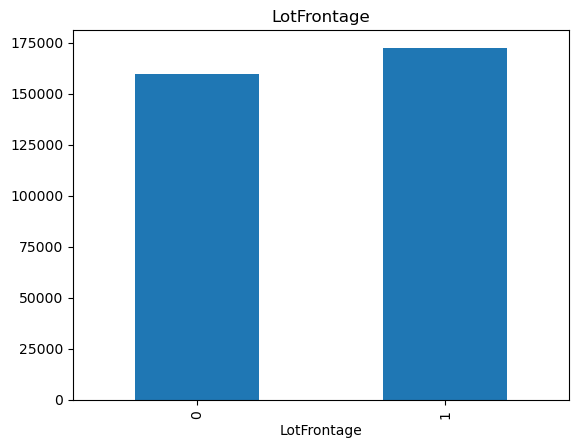

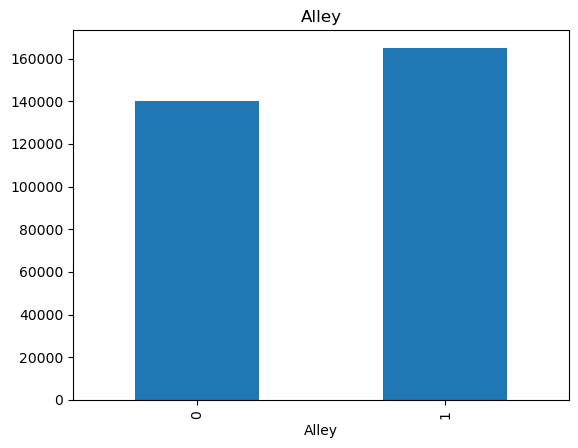

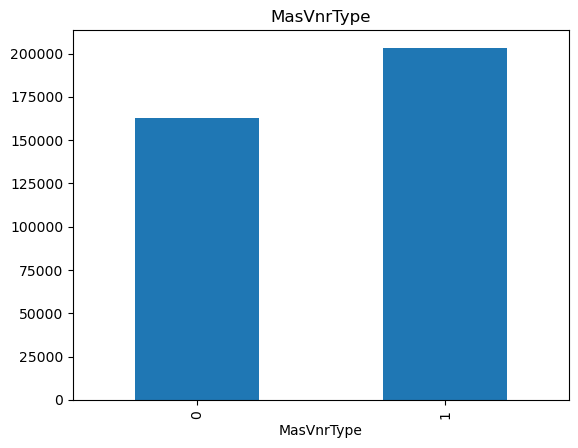

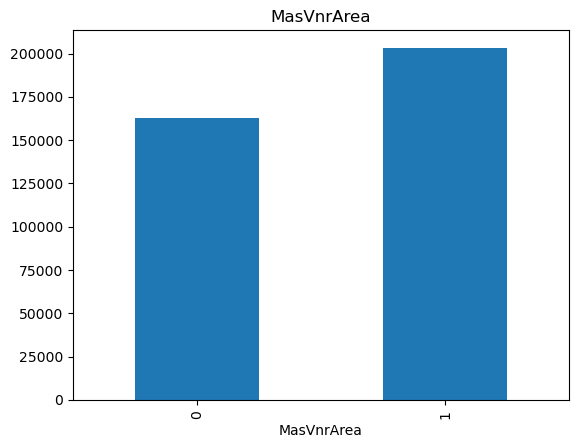

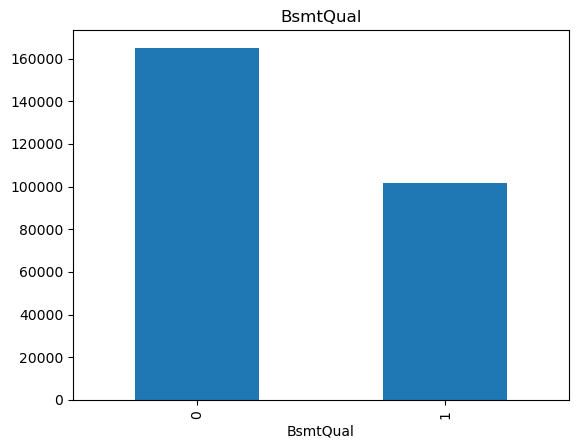

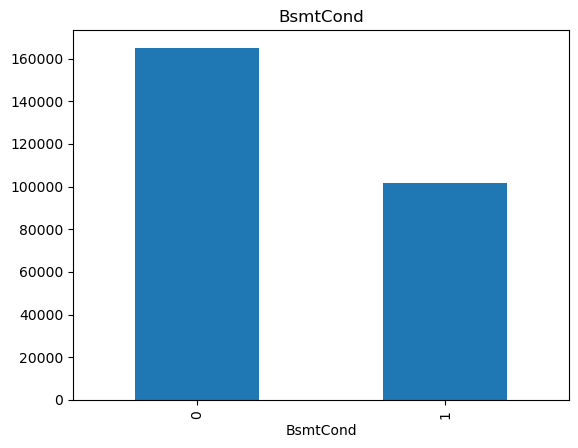

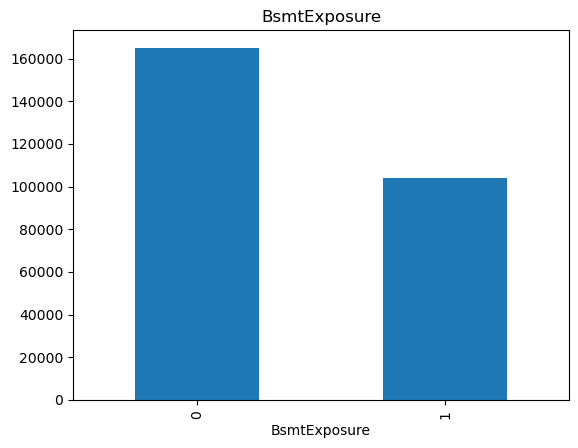

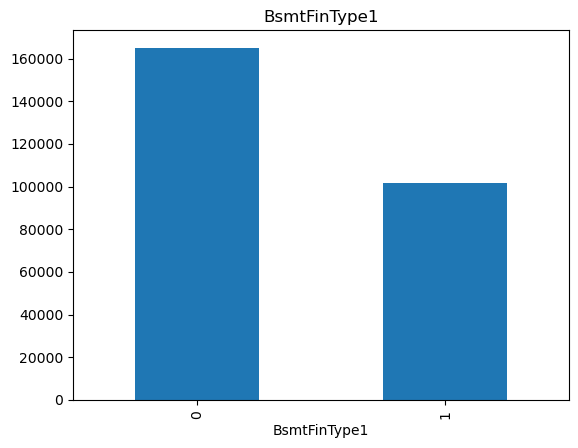

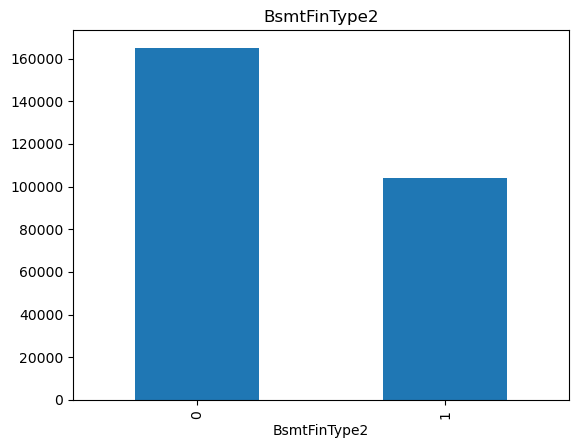

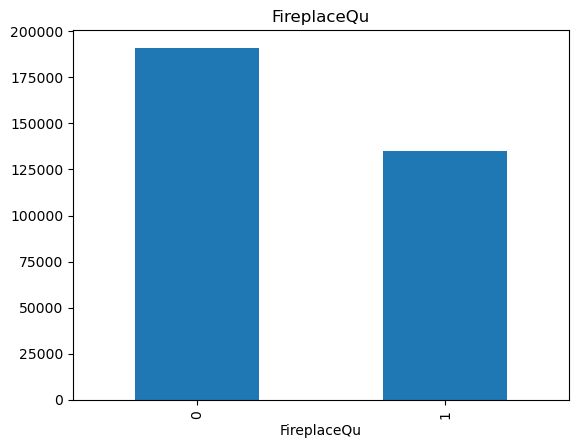

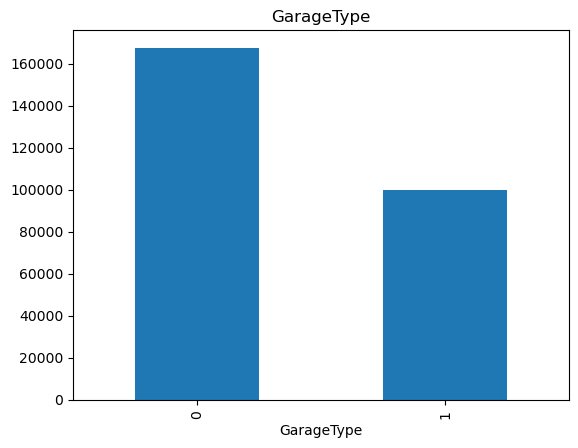

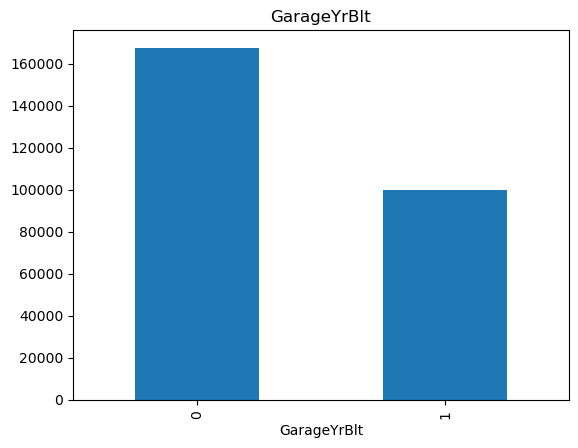

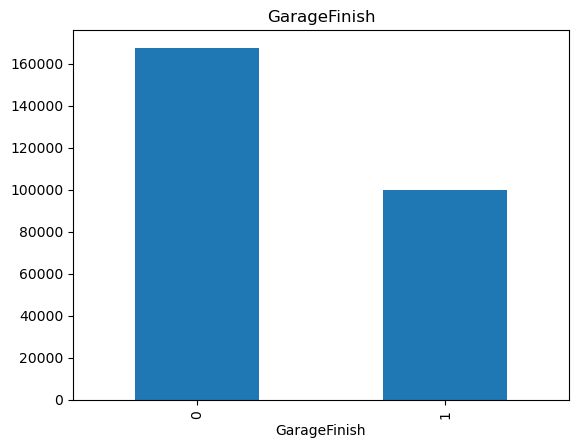

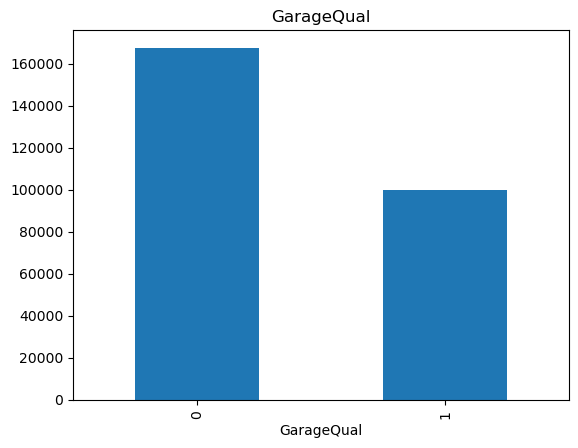

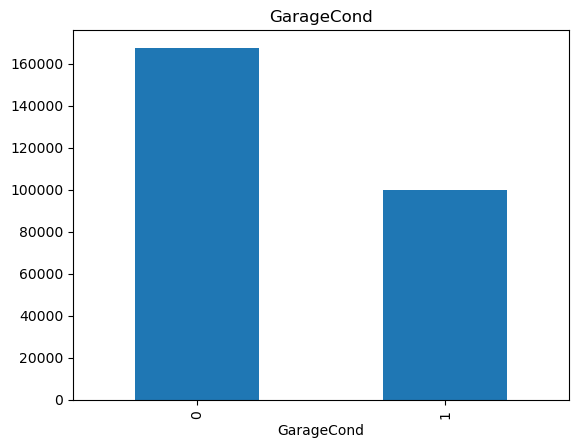

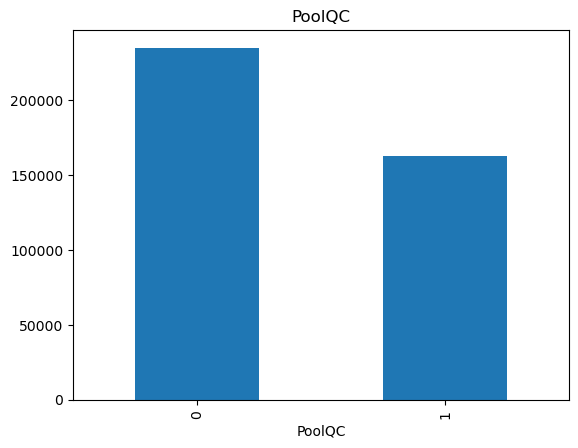

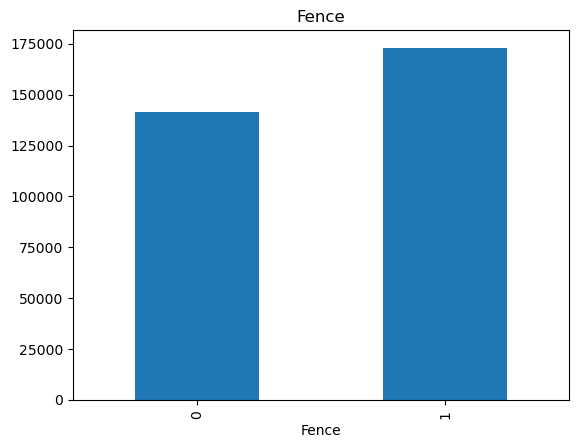

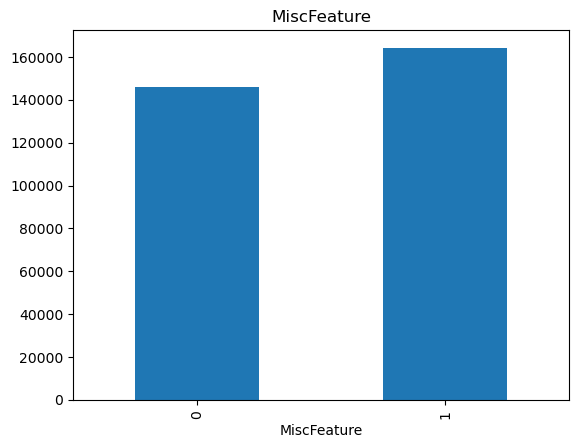

In [22]:
for feature in features_with_na :
    data = dataset.copy()
    data[feature] = np.where(dataset[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

FIND NUMERICAL FEATURES : 

In [24]:
numerical_features = [features for features in dataset.columns if dataset[features].dtype != 'O']
print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Find Features with Temporal Data (Eg, YEAR information etc)

In [28]:
temporal_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print(temporal_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0, 0.5, 'Median Price')

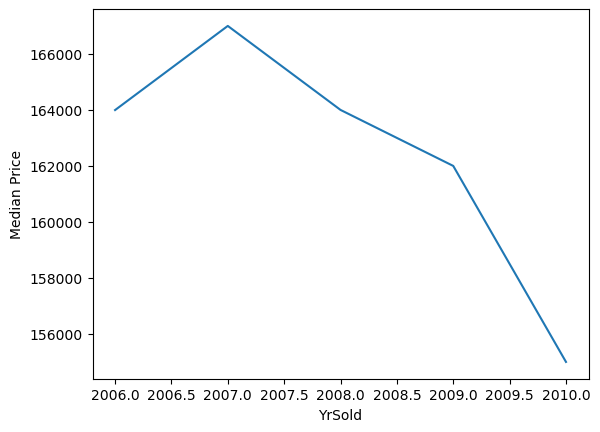

In [30]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median Price')

Each year the price should increase, but it is decreasing which is not really practical. Thus, we need some more information.

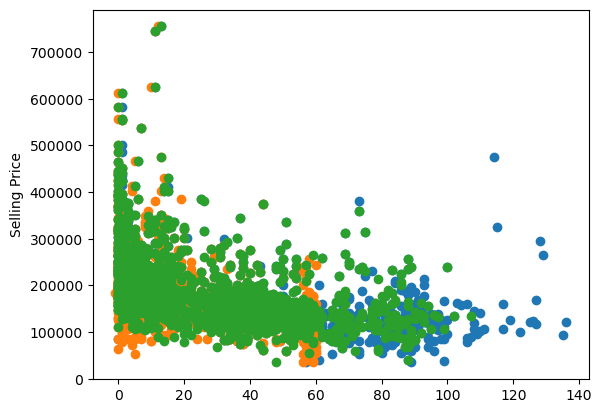

In [36]:
for feature in temporal_features:
    if feature!='YrSold':
        data = dataset.copy()
        data[feature] = dataset['YrSold']-dataset[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.ylabel("Selling Price")
        

<Axes: xlabel='YrSold'>

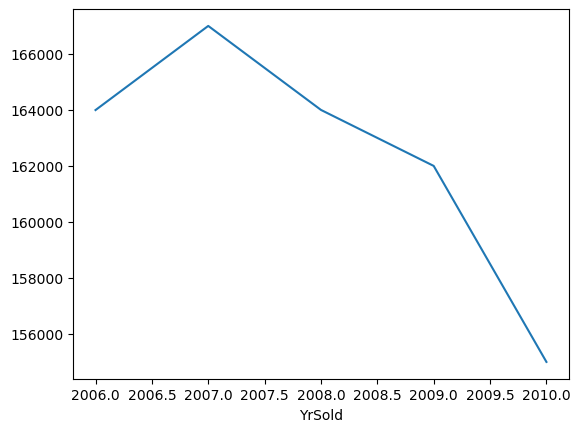

In [41]:
dataset.groupby('YrSold')['SalePrice'].median().plot()

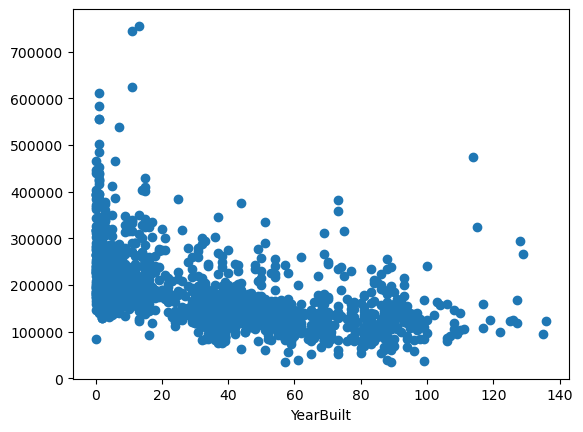

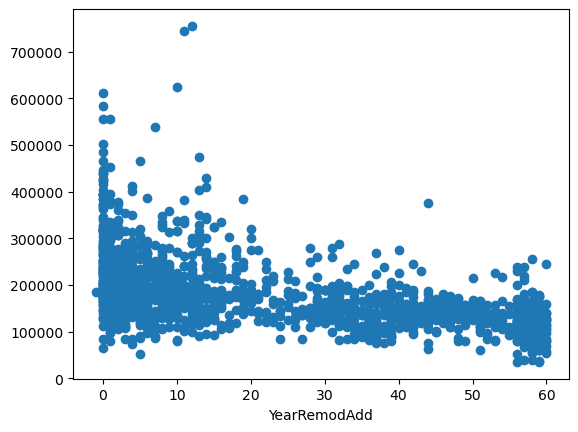

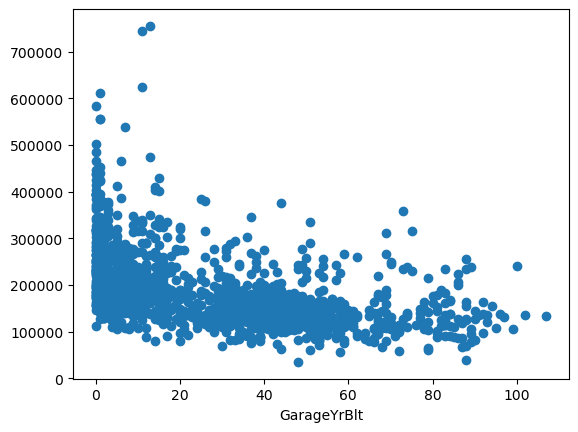

In [47]:
for feature in temporal_features:
    if feature!='YrSold':
        data = dataset.copy()
        data[feature] = dataset['YrSold'] - dataset[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.show()

In [66]:
numeric_columns = [feature for feature in dataset.columns if dataset[feature].dtype=='int64' or dataset[feature].dtype=='float64']
continous_features = [feature for feature in numeric_columns if dataset[feature].nunique()>20]
continous_features.remove('Id')
# THIS CODE FINDS THE CONTINOUS FEATURES IN THE DATASET

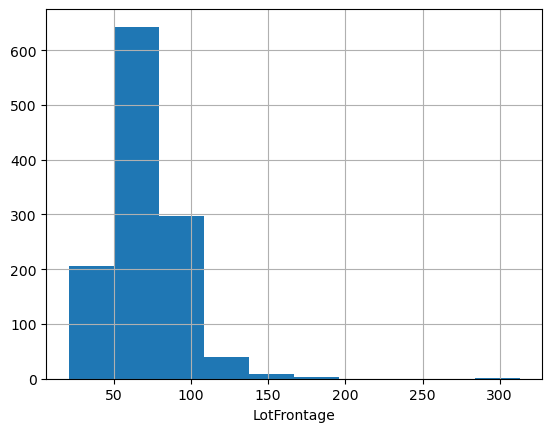

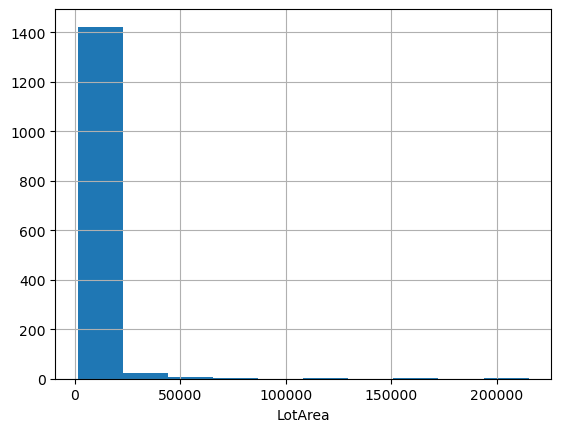

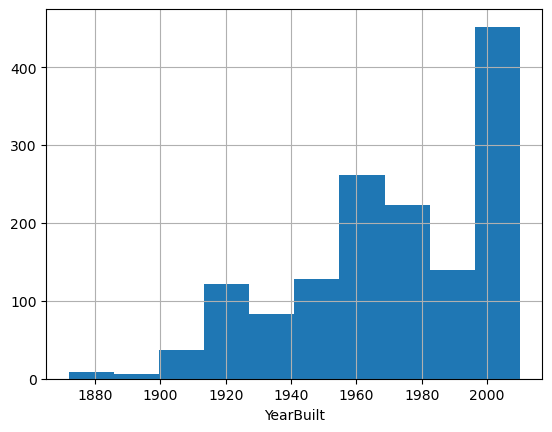

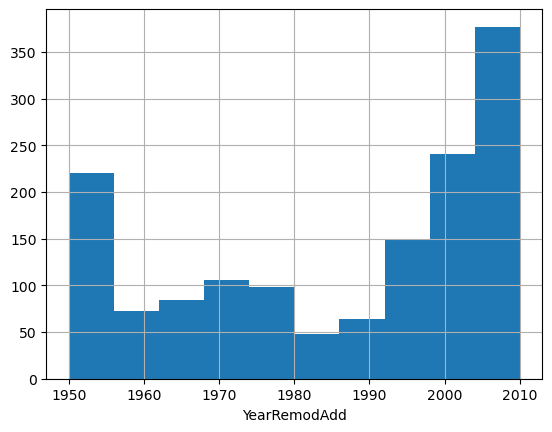

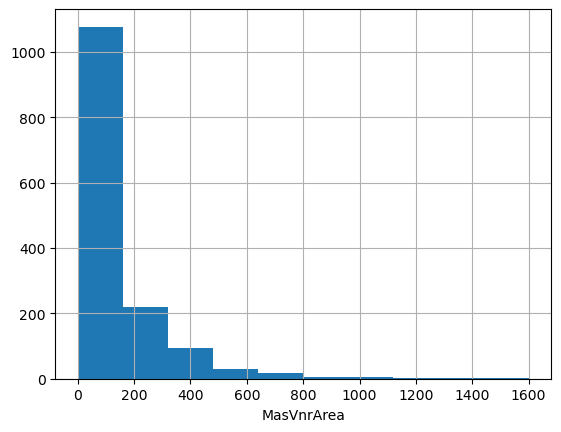

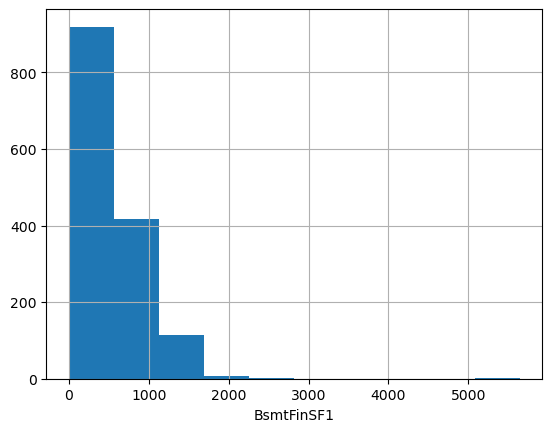

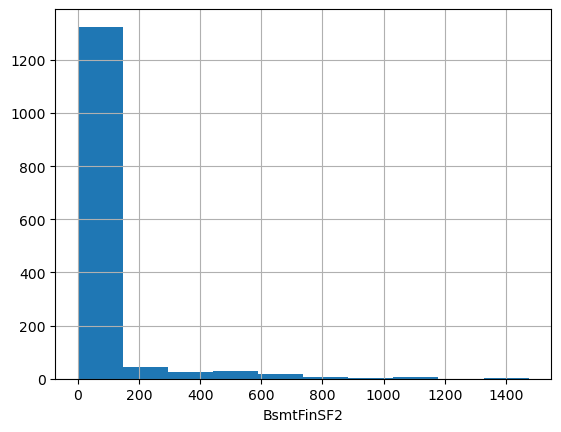

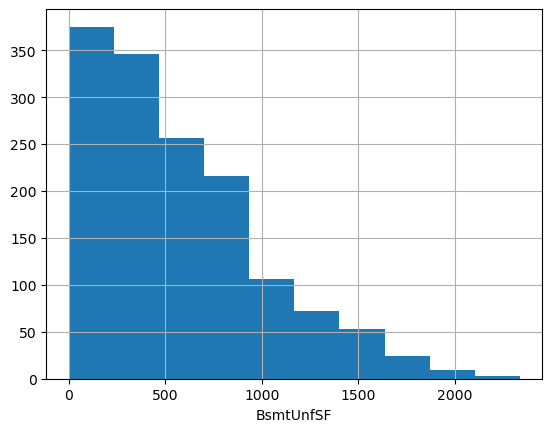

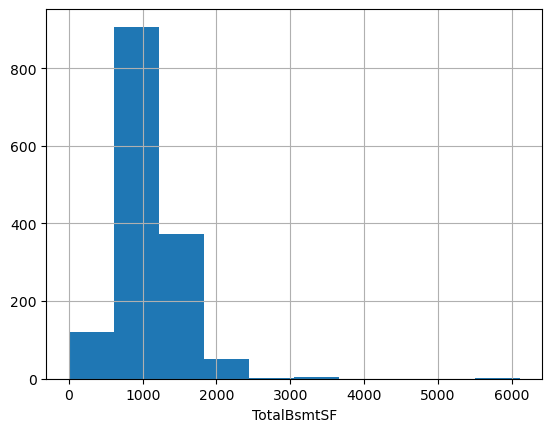

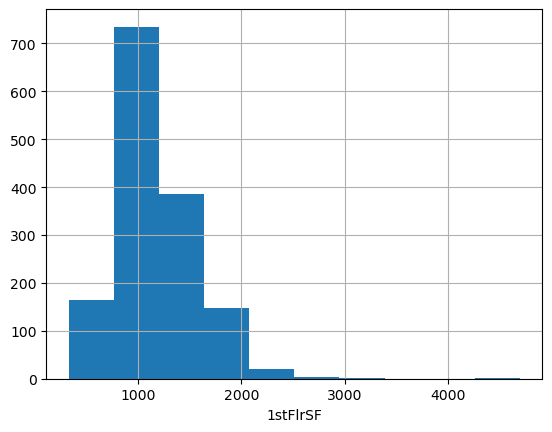

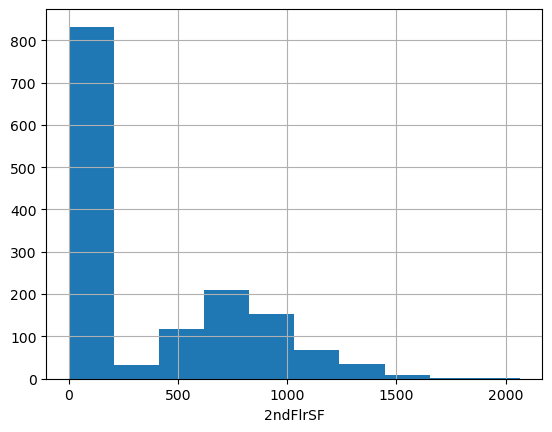

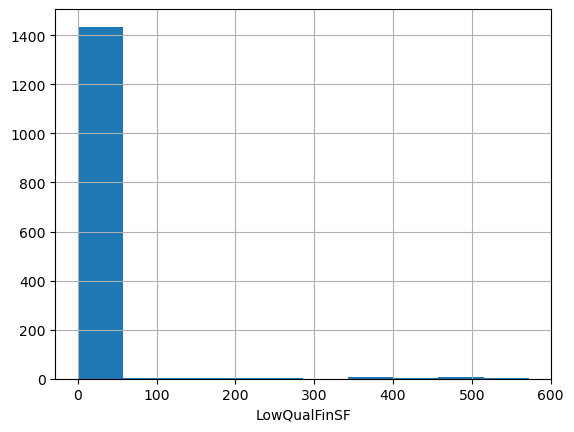

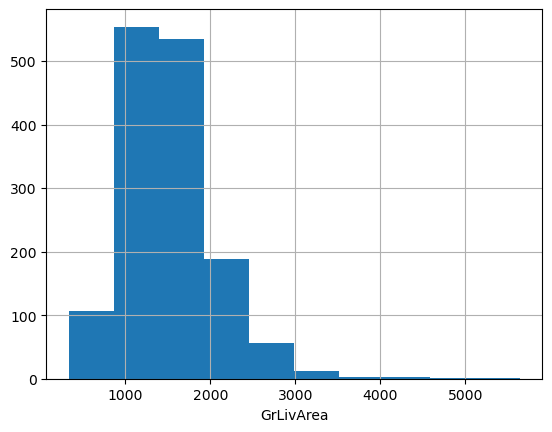

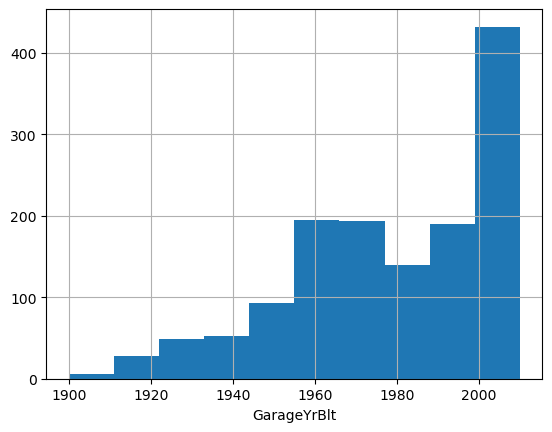

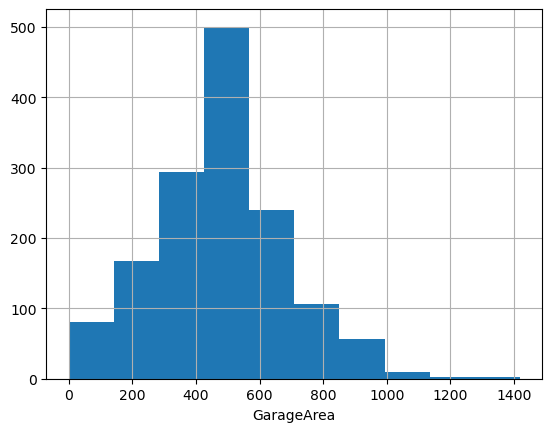

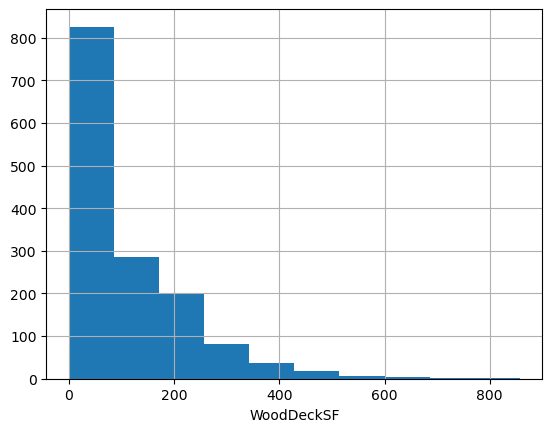

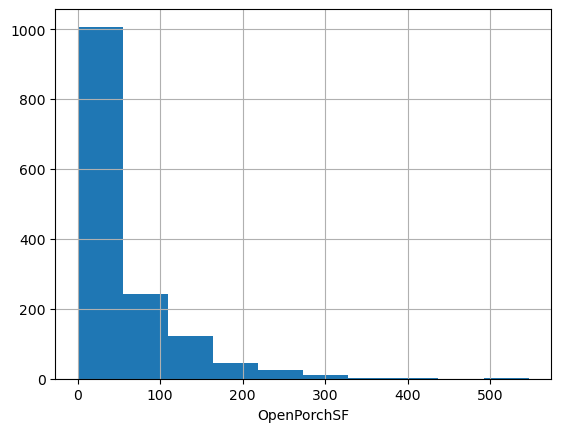

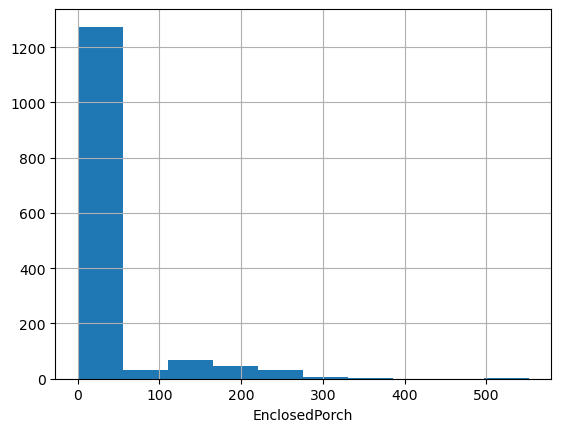

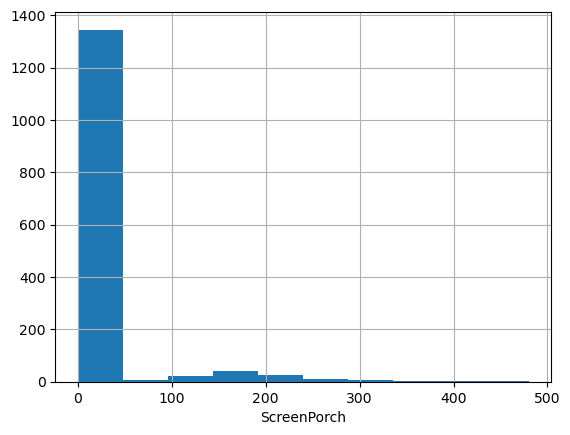

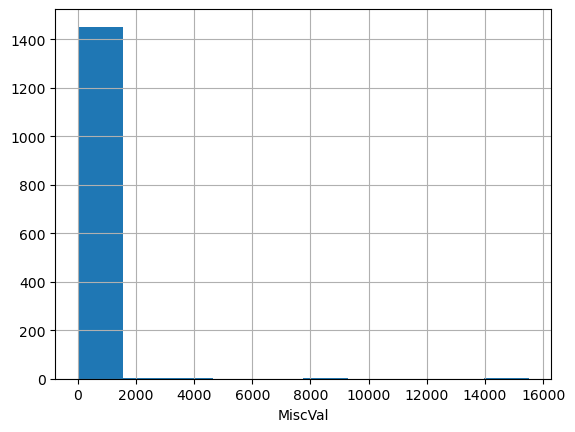

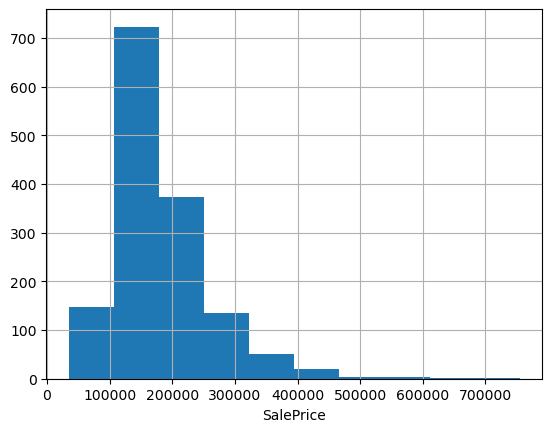

In [68]:
for feature in continous_features:
    dataset[feature].hist()
    plt.xlabel(feature)
    plt.show()